#Import Packages

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Import Data

#####Load Dataset

In [0]:
data = pd.read_csv('air_bnb.csv')

#####Observasi Dataset



*   Mengecek fitur data dan kelas




In [312]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26




*   Mengecek deskripsi kolom data



In [313]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.255200e+04,2.255200e+04,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,18638.000000,22552.000000,22552.000000
mean,1.571560e+07,5.403355e+07,52.509824,13.406107,67.143668,7.157059,17.840679,1.135525,1.918233,79.852829
std,8.552069e+06,5.816290e+07,0.030825,0.057964,220.266210,40.665073,36.769624,1.507082,3.667257,119.368162
min,2.015000e+03,2.217000e+03,52.345803,13.103557,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,8.065954e+06,9.240002e+06,52.489065,13.375411,30.000000,2.000000,1.000000,0.180000,1.000000,0.000000
50%,1.686638e+07,3.126711e+07,52.509079,13.416779,45.000000,2.000000,5.000000,0.540000,1.000000,4.000000
75%,2.258393e+07,8.067518e+07,52.532669,13.439259,70.000000,4.000000,16.000000,1.500000,1.000000,129.000000
max,2.986735e+07,2.245081e+08,52.651670,13.757642,9000.000000,5000.000000,498.000000,36.670000,45.000000,365.000000




*   Mengecek info data


In [314]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22552 non-null  int64  
 1   name                            22493 non-null  object 
 2   host_id                         22552 non-null  int64  
 3   host_name                       22526 non-null  object 
 4   neighbourhood_group             22552 non-null  object 
 5   neighbourhood                   22552 non-null  object 
 6   latitude                        22552 non-null  float64
 7   longitude                       22552 non-null  float64
 8   room_type                       22552 non-null  object 
 9   price                           22552 non-null  int64  
 10  minimum_nights                  22552 non-null  int64  
 11  number_of_reviews               22552 non-null  int64  
 12  last_review                     



*   Mengecek/menemukan data unique



In [315]:
data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
22547,29856708,Cozy Apartment right in the center of Berlin,87555909,Ulisses,Mitte,Brunnenstr. Süd,52.533865,13.400731,Entire home/apt,60,2,0,NaN,NaN,1,314
22548,29857108,Altbau/ Schöneberger Kiez / Schlafsofa,67537363,Jörg,Tempelhof - Schöneberg,Schöneberg-Nord,52.496211,13.341738,Shared room,20,1,0,NaN,NaN,6,78
22549,29864272,Artists loft with garden in the center of Berlin,3146923,Martin,Pankow,Prenzlauer Berg Südwest,52.531800,13.411999,Entire home/apt,85,3,0,NaN,NaN,2,15
22550,29866805,Room for two with private shower / WC,36961901,Arte Luise,Mitte,Alexanderplatz,52.520802,13.378688,Private room,99,1,0,NaN,NaN,3,6
22551,29867352,"Sunny, modern and cozy flat in Berlin Neukölln :)",177464875,Sebastian,Neukölln,Schillerpromenade,52.473762,13.424447,Private room,45,5,0,NaN,NaN,1,21




*   Menampilkan data unique



In [316]:
print("Room Type")
print(data['room_type'].unique())

Room Type
['Entire home/apt' 'Private room' 'Shared room']


#Data Cleansing

#####Memperbaiki data yang duplicate, NaN, Null



*   Mengecek data duplikat



In [317]:
print(f'Duplicate : {data.duplicated().sum()}')
data[~data.duplicated()].shape

Duplicate : 0


(22552, 16)



*   Mengecek data NaN, Null


In [318]:
data.isna().sum()

id                                   0
name                                59
host_id                              0
host_name                           26
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3908
reviews_per_month                 3914
calculated_host_listings_count       0
availability_365                     0
dtype: int64



*   Menghapus kolom



In [0]:
data.drop(['host_name'], axis = 1, inplace = True)
data.drop(['last_review'], axis = 1, inplace = True)



*   Memperbaiki/mengganti values data



In [0]:
data.fillna({'reviews_per_month':0}, inplace=True) 
data.fillna({'name':0}, inplace=True) 



*   Mengecek kembali apakah masih ada data yang NaN, Null



In [321]:
data.isna().sum()

id                                0
name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#Eksperimen 1

##Data Exploration



*   Memperkecil jumlah kolom dengan melakukan pemilihan kolom



In [322]:
pilih_kolom = ['price','minimum_nights','reviews_per_month','availability_365','room_type']
df = data[pilih_kolom]
df.tail()

,price,minimum_nights,reviews_per_month,availability_365,room_type
22547,60,2,0.0,314,Entire home/apt
22548,20,1,0.0,78,Shared room
22549,85,3,0.0,15,Entire home/apt
22550,99,1,0.0,6,Private room
22551,45,5,0.0,21,Private room




*  Melihat relasi antar fitur dengan heatmap.



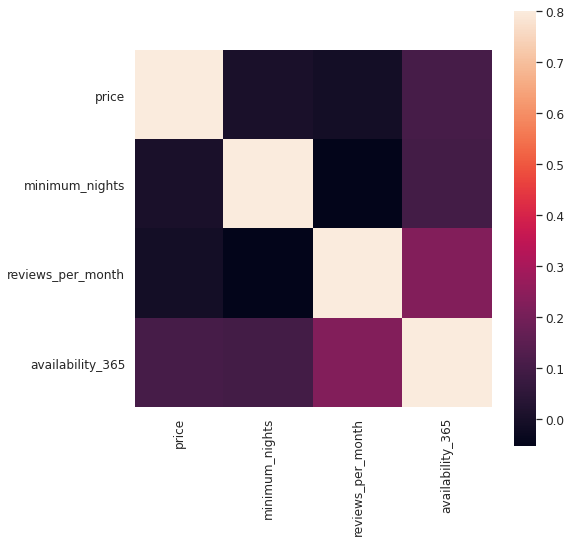

In [323]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

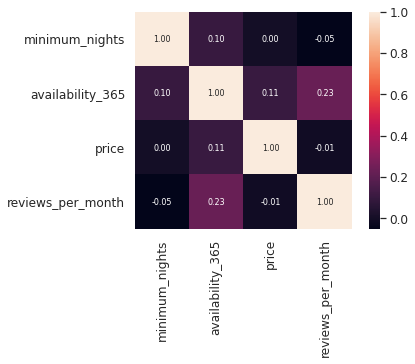

In [324]:
k =5 
cols = corrmat.nlargest(k, 'minimum_nights')['minimum_nights'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()



*   Mendefinisikan y



In [0]:
y = df['minimum_nights']



*   Melakukan proses encoding kolom



In [326]:
encode_kolom = pd.get_dummies(df['room_type'])
x = df.join(encode_kolom).drop('room_type', axis = 1)
x.head()

,price,minimum_nights,reviews_per_month,availability_365,Entire home/apt,Private room,Shared room
0,60,4,3.76,141,1,0,0
1,17,2,1.42,0,0,1,0
2,90,62,1.25,220,1,0,0
3,26,5,0.39,297,0,1,0
4,42,2,1.75,26,0,1,0




*   Mengecek kembali data (Null, NaN),(Missing Values), bila ada akan dihapus



In [327]:
x_null = round(100*(x.isnull().sum())/len(x), 2)
x_null

price                0.0
minimum_nights       0.0
reviews_per_month    0.0
availability_365     0.0
Entire home/apt      0.0
Private room         0.0
Shared room          0.0
dtype: float64


*   Mengecek tipe data kolom 



In [328]:
x.dtypes

price                  int64
minimum_nights         int64
reviews_per_month    float64
availability_365       int64
Entire home/apt        uint8
Private room           uint8
Shared room            uint8
dtype: object

##Classification

Data splitting.

In [329]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42) 

print("x train shape:",x_train.shape)
print("x test shape:",x_test.shape)
print("y train shape:",y_train.shape)
print("y test shape:",y_test.shape)


x train shape: (15109, 7)
x test shape: (7443, 7)
y train shape: (15109,)
y test shape: (7443,)


#####KNN Classification

Algoritma ini melakukan klasifikasi terhadap objek berdasarkan data pembeljaran yang jaraknya paling dekat dengan objek tersebut.

In [330]:
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(x_train,y_train)
print("KNN score",knn.score(x_test,y_test)*100)


KNN score 65.47091226655918


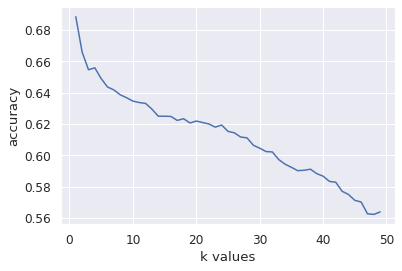

In [331]:
neighbors_list = []

for i in range(1,50):
    knn1 = KNeighborsClassifier(n_neighbors = i)
    knn1.fit(x_train,y_train)
    neighbors_list.append(knn1.score(x_test,y_test))

plt.plot(range(1,50),neighbors_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

#####Naive Bayes

Algoritman ini untuk memprediksi data yang tidak diketahui untuk di klasifikasi dan prosesnya lebih cepat daripada algoritma laiinya. Dan algoritma ini bekerja pada probabilitas teorema bayes.

In [332]:
nb = GaussianNB()
nb.fit(x_train,y_train)
print("Naive Boyes score",nb.score(x_test,y_test))

Naive Boyes score 0.9962380760446057


#####Decision Tree Classification

Algoritma ini bekerja secara plot. Dimana plot dibagi menjadi subplot. Model prediksi dari algoritma ini menggunakan struktur pohon atau struktur berhirarki.

In [333]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("Decision Tree Score",dt.score(x_test,y_test))



Decision Tree Score 0.9979846835953244


#####Random Forest Classification

Algoritma ini adalah model pembelajaran ensemble. Dibutuhkan jumlah Decision Tree untuk satu proses algoritmanya. Klasifikasi algoritma ini dilakukan melalui penggabungan pohon(tree) dengan melakukan training pada sampel yang dimiliki.

In [334]:
rf = RandomForestClassifier(n_estimators = 10, random_state=1)
rf.fit(x_train,y_train)
print("Random Forest Classification Score",rf.score(x_test,y_test))



Random Forest Classification Score 0.9266424828698105


##Comparison of Algorithm Performance

In [335]:
print("KNN score 1:",knn.score(x_test,y_test)*100)
print("Naive Boyes score 1:",nb.score(x_test,y_test)*100) 
print("Decision Tree Score 1:",dt.score(x_test,y_test)*100)
print("Random Forest Classification Score 1:",rf.score(x_test,y_test)*100)

KNN score 1: 65.47091226655918
Naive Boyes score 1: 99.62380760446057
Decision Tree Score 1: 99.79846835953245
Random Forest Classification Score 1: 92.66424828698105


#Eksperimen 2

##Data Exploration



*   Memperkecil jumlah kolom dengan melakukan pemilihan kolom


In [336]:
new_pilih_kolom = ['minimum_nights','reviews_per_month','availability_365','room_type']
new_df = data[new_pilih_kolom]
new_df.tail()

,minimum_nights,reviews_per_month,availability_365,room_type
22547,2,0.0,314,Entire home/apt
22548,1,0.0,78,Shared room
22549,3,0.0,15,Entire home/apt
22550,1,0.0,6,Private room
22551,5,0.0,21,Private room




*   Melihat relasi antar fitur dengan heatmap



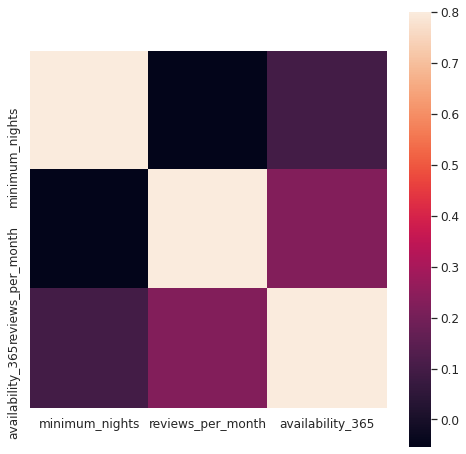

In [337]:
new_corrmat = new_df.corr()
new_f, new_ax = plt.subplots(figsize=(8, 8))
sns.heatmap(new_corrmat, vmax=.8, square=True);

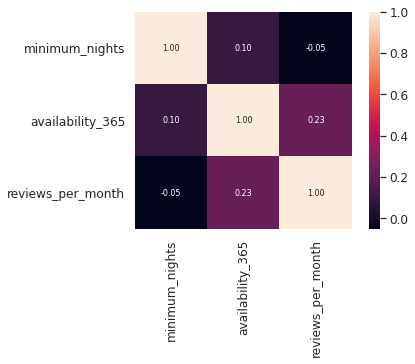

In [339]:
k =4
cols = new_corrmat.nlargest(k, 'minimum_nights')['minimum_nights'].index
cm = np.corrcoef(new_df[cols].values.T)
sns.set(font_scale=1.1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()



*   Mendefinisikan new_y



In [0]:
new_y = new_df['minimum_nights']

##Classification



Data splitting



In [341]:
x_train,x_test,y_train,y_test = train_test_split(x,new_y,test_size=0.33,random_state=42) 

print("x train shape:",x_train.shape)
print("x test shape:",x_test.shape)
print("y train shape:",y_train.shape)
print("y test shape:",y_test.shape)

x train shape: (15109, 7)
x test shape: (7443, 7)
y train shape: (15109,)
y test shape: (7443,)


#####KNN Classification

Algoritma ini melakukan klasifikasi terhadap objek berdasarkan data pembeljaran yang jaraknya paling dekat dengan objek tersebut.

In [342]:
new_knn = KNeighborsClassifier(n_neighbors=3) 
new_knn.fit(x_train,y_train)
print("KNN score",new_knn.score(x_test,y_test)*100)

KNN score 65.47091226655918


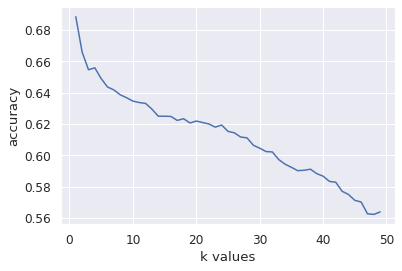

In [343]:
neighbors_list = []

for i in range(1,50):
    knn1 = KNeighborsClassifier(n_neighbors = i)
    knn1.fit(x_train,y_train)
    neighbors_list.append(knn1.score(x_test,y_test))

plt.plot(range(1,50),neighbors_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

#####Naive Bayes

Algoritman ini untuk memprediksi data yang tidak diketahui untuk di klasifikasi dan prosesnya lebih cepat daripada algoritma laiinya. Dan algoritma ini bekerja pada probabilitas teorema bayes.

In [344]:
new_nb = GaussianNB()
new_nb.fit(x_train,y_train)
print("Naive Boyes score",new_nb.score(x_test,y_test))

Naive Boyes score 0.9962380760446057


#####Decision Tree Classification

Algoritma ini bekerja secara plot. Dimana plot dibagi menjadi subplot. Model prediksi dari algoritma ini menggunakan struktur pohon atau struktur berhirarki.

In [345]:
new_dt = DecisionTreeClassifier()
new_dt.fit(x_train,y_train)
print("Decision Tree Score",new_dt.score(x_test,y_test))

Decision Tree Score 0.9967754937525192


#####Random Forest Classification

Algoritma ini adalah model pembelajaran ensemble. Dibutuhkan jumlah Decision Tree untuk satu proses algoritmanya. Klasifikasi algoritma ini dilakukan melalui penggabungan pohon(tree) dengan melakukan training pada sampel yang dimiliki.

In [346]:
new_rf = RandomForestClassifier(n_estimators = 10, random_state=1)
new_rf.fit(x_train,y_train)
print("Random Forest Classification Score",new_rf.score(x_test,y_test))

Random Forest Classification Score 0.9266424828698105


##Comparison of Algorithm Performance

In [347]:
print("KNN score 2:",new_knn.score(x_test,y_test)*100)
print("Naive Boyes score 2:",new_nb.score(x_test,y_test)*100)
print("Decision Tree Score 2:",new_dt.score(x_test,y_test)*100)
print("Random Forest Classification Score 2:",new_rf.score(x_test,y_test)*100)

KNN score 2: 65.47091226655918
Naive Boyes score 2: 99.62380760446057
Decision Tree Score 2: 99.67754937525191
Random Forest Classification Score 2: 92.66424828698105


#Kesimpulan

*   Dalam proses Classification, harus terjadi beberapa modifikasi dataframe.
*   Hasil dari Classification ditentukan oleh fitur yang kita pilih,dataset yang kita jadikan data training maupun data testing. Dan juga text size dan random state juga mempengaruhi kinerja proses klasifikasi.
*   Data yang Unique yang mempunyai hubungan sangat mempengaruhi hasil dari proses klasifikasi.
*   Score akurasi dari beberapa Model Classification berbeda-beda, bisa dilihat di **Comparison of Algorithm Performance**, dengan rentang score akurasi 65%  sampai dengan 99% sekian.
*   Berbagai macam settingan pada model klasifikasi juga mempengaruhi score akurasi.
*   Model klasifikasi yang lebih baik score akurasinya yaitu **Decision Tree Classification**.

